# YOUR PYTHON 2020 WRAPPED
### Spotify Data Analysis

Contributors:
* Robert Hall
* Ryan Berberek
* Dulce Ximena Cid Sanabria
* Max Moran

### Table of Contents:

1. Data Importation & Exploratory Data Analysis
2. Who Are The Top 5 Artists Represented In The Dataset?
3. What Genre Categories Are Represented? What Is The Proportional Distribution Of Genres?
4. Visualizing Each Variable's Correlation With The Others Using A Correlation Matrix
5. Linear Model To Analyze The Correlation Between Song Duration (`song_duration`) And Popularity Score (`track_score`)
6. Linear Model To Analyze The Correlation Between Perceived Song Energy (`energy`) And Percieved Song Loudness (`loudness`)
7. Comparative Analysis On Performance Of The Prior Two Linear Models

### Introduction

For this project, we focused on a 2020 Spotify dataset and the effects it had on holistic observations for over 32k tracks. This can help us better understand exactly why a song performs well in certain areas. After cleaning and a general overview of the data, we looked at correlation, proportions, and created linear models to analyze variables of interest. We plan to use pie charts, correlation matrices, and scikit-learn regression models to address the problem. Our analysis will serve users in helping accurately identify why a track performs or feels the way it does.

### Data Preparation
#### Original Source:
[Tidy Tuesday's challenge](https://github.com/rfordatascience/tidytuesday/tree/main/data/2020/2020-01-21) for the week of January 21st, 2020. 

This dataset was originally scraped from Spotify's Web API using spotifyr package in r to simplify the learning process for newer coders in data science. By removing the barrier to entry in dataset creation, the weekly social challenge allows more people to participate in new, exciting data.  
While tidytuesday recommends using their datasets not to draw conclusions about causation and simply practice coding, our classroom environment is given more time than the quick visualizations usually featured in the event, meaning we have more time and reason to think about conclusions.
Upon cleaning, after removing duplicates in track_id (as some songs feature in many official spotify playlists), we found very few missing values, only a handful in columns such as album_name and artist_name. 

### 1. Data Importation & Exploratory Data Analysis

In [1]:
# import libraries and set up dataframe
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# pandas allows for use of data frames to better organize and analyze the dataset
# matplotlib and seaborn allow for comprehensive data visualization
spotify = pd.read_csv('spotify_songs.csv')

In [2]:
spotify = spotify.drop_duplicates(subset=['track_id']) #drop duplicated songs
spotify.shape

(28356, 23)

In [3]:
spotify.isna().sum()  #Find missing values

track_id                    0
track_name                  4
track_artist                4
track_popularity            0
track_album_id              0
track_album_name            4
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [4]:
spotify= spotify.dropna() #drop n/a values
spotify.shape

(28352, 23)

In [5]:
# check what features are available, and the datatypes of each feature 
spotify.dtypes

track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
dtype: object

### 2. Who Are The Top 5 Artists Represented In The Dataset?

In [6]:
# dataframe containing only features track_artist, track_popularity
artist_scores = spotify[['track_artist', 'track_popularity']]

# check for null values
artist_scores.isnull().sum()

track_artist        0
track_popularity    0
dtype: int64

In [7]:
# drop instances where track_artist is null
artist_scores = artist_scores.dropna(subset=['track_artist'])

# check once again for null values
artist_scores.isnull().sum()

track_artist        0
track_popularity    0
dtype: int64

In [8]:
# generate the dataframe of average artist scores, in descending order
highest_scores = artist_scores.groupby('track_artist')['track_popularity'].mean().reset_index()

# sort highest scores in descending order
highest_scores = highest_scores.sort_values(by='track_popularity', ascending=False)

# get the top 5 scores
highest_scores  = highest_scores[0:5]

# round track_popularity to 2 decimal places
highest_scores['track_popularity'] = round(highest_scores['track_popularity'], 2)

# rename columns to more apt titles
highest_scores.rename(columns={'track_artist': 'Artist',
                               'track_popularity': 'Average Popularity Score'})

,Artist,Average Popularity Score
9735,Trevor Daniel,97.00
10242,Y2K,91.00
2601,Don Toliver,87.50
5040,Kina,85.50
4196,JACKBOYS,84.33


In [9]:
#Visualization: Group by Artist and calculate the average track_popularity score
top_artists = (spotify.groupby("track_artist")["track_popularity"].mean().sort_values(ascending=False).reset_index()) 

In [31]:
top_artists = top_artists.rename(columns={"track_popularity": "average_popularity"}) # Rename column
top_artists = top_artists.head()

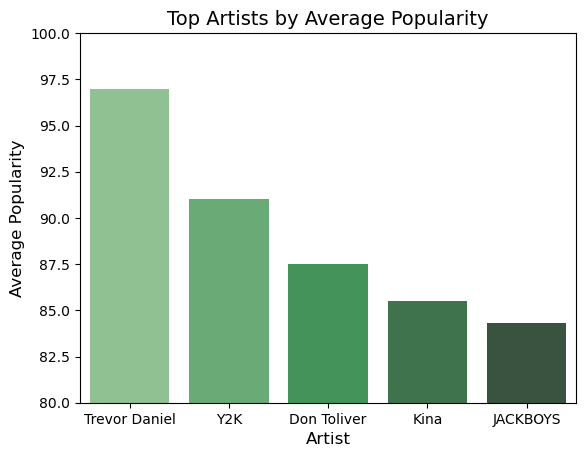

In [33]:
#plot
import warnings
warnings.filterwarnings("ignore")
sns.barplot(data=top_artists, y=top_artists['average_popularity'], x=top_artists['track_artist'], palette='Greens_d', legend=False)
plt.title('Top Artists by Average Popularity', fontsize=14)
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Average Popularity', fontsize=12)
plt.ylim(80, 100)  # Change y-axis limits for better visualization
plt.show()

These artists have the highest average popularity scores across their tracks. This indicate that they dominated listener preferences in 2020, maintaining a high level of popularity across multiple tracks in the dataset. **Trevor Daniel** leads with the highest average popularity score of 97, making him the most popular artist of the database. **Y2K** and **Don Toliver** follow closely, with their average scores ~90. Finally, **Kina**, and **JACKBOYS** complete the list, with average scores ~84.

### 3. What Genre Categories Are Represented? What Is The Proportional Distribution Of Genres?

In [34]:
genre_counts = spotify['playlist_genre'].value_counts() #Counts hoy many times a genre is found in the database

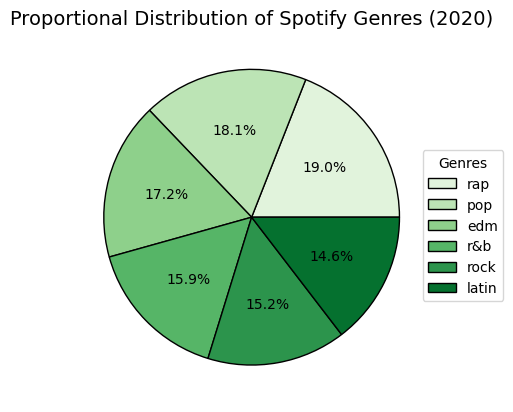

In [35]:
colors = sns.color_palette("Greens") #setting green palette

#Plot
plt.pie(genre_counts.values, colors=colors, autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'}) # Autopct shows the percentages of each genre & Wedgeprops adds black edges for clarity

#Add legend with genres
plt.legend(labels=genre_counts.index, title="Genres", fontsize=10, bbox_to_anchor=(1.2, .7)) #bbox_to_anchor gives the position of the legend box

plt.title('Proportional Distribution of Spotify Genres (2020)', fontsize=14)
plt.show()

The chart reveals that **Rap, Pop, and EDM** are the most listen genres in Spotify, however no single genre strongly dominates. The difference between the top (**Rap**) and the lowest genre (**Latin**) is less than 5%. This genre diversity suggests that listeners in 2020 valued music variety and were open to exploring different styles.

In [36]:
#Group by Genre and calculate the average track_popularity score
top_genres = (spotify.groupby("playlist_genre")["track_popularity"].mean().sort_values(ascending=False).reset_index()) 

In [37]:
# Rename column
top_genres = top_genres.rename(columns={"track_popularity": "average_popularity"}) 

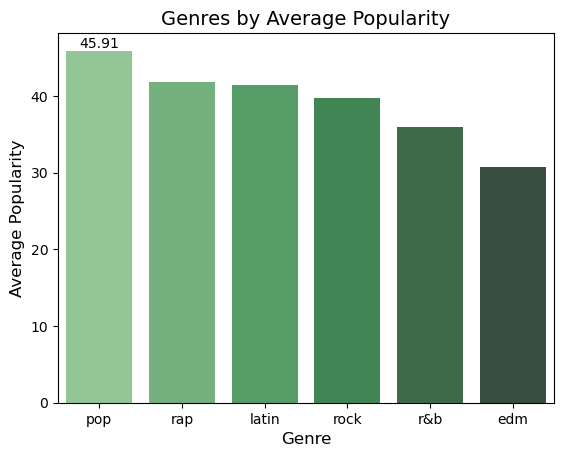

In [38]:
#Plot
bar=sns.barplot(x=top_genres['playlist_genre'], y=top_genres['average_popularity'], data=top_genres, palette='Greens_d')
plt.title('Genres by Average Popularity', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Popularity', fontsize=12)
bar.bar_label(bar.containers[0], fmt='%.2f') #bar_label shows the popularity score of each genre
plt.show()

The **Pop** genre has the highest average popularity score (45.91), closely followed by **Rap** (41.82). These genres might resonate most with listeners in 2020. There is a noticeable gap between the top genres and the lowest-performing genre (**EDM**). The difference of about 15 points suggests a clear distinction in audience preference.

### 4. Visualizing Each Variable's Correlation With The Others Using A Correlation Matrix

In [39]:
# Create data subset specifically for correlation matrix
spotify_corr_subset = spotify[spotify.columns[9:23]].assign(track_popularity=spotify['track_popularity'])
spotify_corr_subset = spotify_corr_subset.drop('playlist_subgenre', axis=1)

In [40]:
# Perform one-hot encoding of genre for purposes of correlation matrix insights
spotify_corr_subset = pd.get_dummies(spotify_corr_subset, columns=['playlist_genre'], prefix='genre')

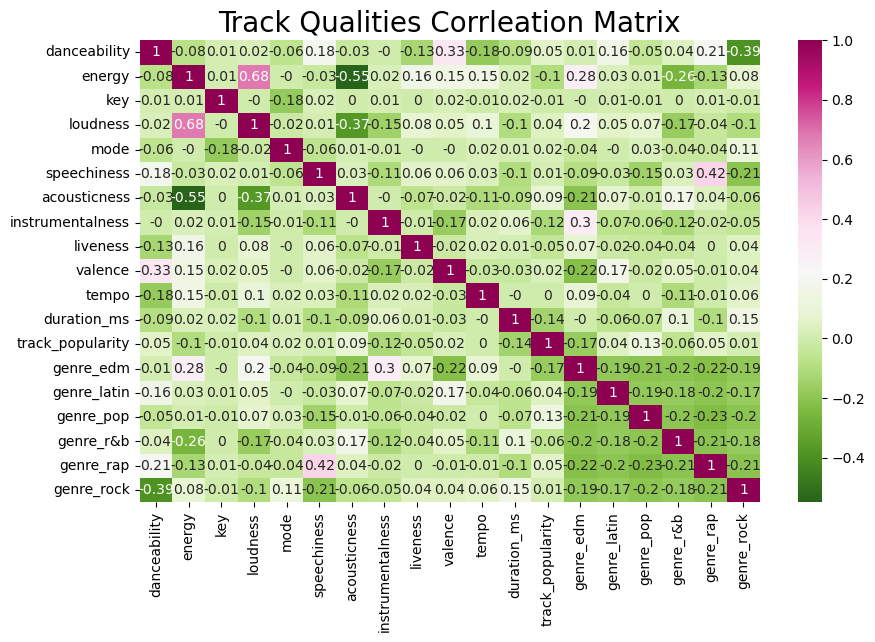

In [41]:
# Generate larger sized plot containing seaborn heatmap (reversed color mapping)
plt.figure(figsize=(10,6))
plt.title('Track Qualities Corrleation Matrix', fontsize=20)
sns.heatmap(spotify_corr_subset.corr().round(2), cmap = 'PiYG_r', annot=True)
# plt.savefig('track_corr.png', bbox_inches='tight')
plt.show()

##### Although distinct correlations are harder to find in this dataset due to the more human factor of music taste in song popularity, our group did notice some important highlights:
- loudness, instrumentalness, duration, and genre_edm have the most (negative) corrleation with song_popularity.
- loudness and energy have a distinct positive correlation, a natural connection. We further explored this connection in our modeling.
- acousticness and energy have a similarly distinct negative correlation, also easily understood.
- genre_rap and speechiness have a somewhat hidden positive correlation, with genre_rock representing the opposite, negative correlation.
- acousticness and loudness have a negative corrleation.

### 5. Linear Model To Analyze The Correlation Between Song Duration (`song_duration`) And Popularity Score (`track_score`)

In [42]:
# import necessary libraries - sklearn allows for simple training and implementation of linear regression models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# create new feature 'duration_min' out of 'duration_ms'
spotify['duration_min'] = spotify['duration_ms'] / 60000

# define input features and prediction variable
X = spotify[['duration_min']]
y = spotify['track_popularity']

# split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

# build and fit model
model_dur_pop = LinearRegression()
model_dur_pop.fit(X_train, y_train)

# get predicted values
y_pred_dur_pop = model_dur_pop.predict(X_test)

Text(0, 0.5, 'Track Popularity')

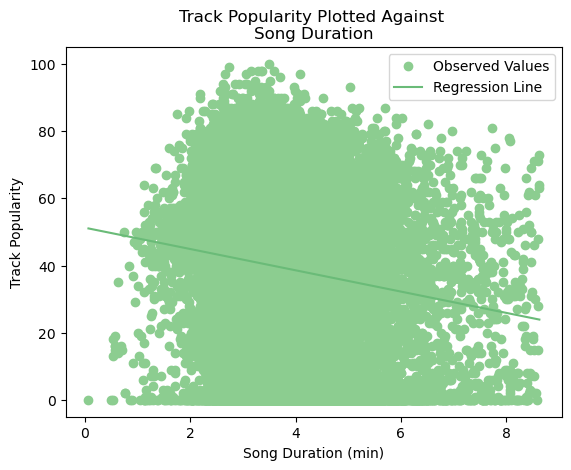

In [21]:
# get predicted y-values for all x instead of only the test subset, to match the length when plotting against all 
pred_y_dur_pop = model_dur_pop.predict(X)

# create dataframe for plot
plot_df = pd.DataFrame({"Duration (min)": X['duration_min'],
                        "Actual Popularity": y,
                        "Predicted Popularity": pred_y_dur_pop})

import seaborn as sns
sns.set_palette('Greens_d')

# Create scatter plot for observed data points
ax = plot_df.plot(x='Duration (min)', y='Actual Popularity', style='o', label='Observed Values')

# Create line plot for the fitted line
plot_df.sort_values('Duration (min)', inplace=True)
plot_df.plot(x='Duration (min)', y='Predicted Popularity', kind='line', ax=ax, label='Regression Line')
#plt.ylim(-0.125, 1)
#plt.xlim(-30, 0)

# Add titles and labels
ax.set_title('Track Popularity Plotted Against \nSong Duration')
ax.set_xlabel('Song Duration (min)')
ax.set_ylabel('Track Popularity')

The datapoints are scattered every which way from the line and show no convergence around a single trend. The regression line is negative and downsloping, but this does not offset the high variance in the dataset, which we can infer means the duration (time length) of a song holds little explaination for the song's popularity score. 

In [22]:
# get coefficient, intercept, and regression line equation for the loudness-energy model
coef_duration_popularity = model_dur_pop.coef_[0]
intercept_duration_popularity = model_dur_pop.intercept_
regline_duration_popularity = f"y = {round(model_dur_pop.coef_[0], 2)}x + {round(model_dur_pop.intercept_, 2)}"

# import metric functions from sklearn metrics library
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# get standard metrics (for later comparative analysis)
R2_duration_popularity = r2_score(y_test, y_pred_dur_pop) # R^2 coefficient
mae_duration_popularity = mean_absolute_error(y_test, y_pred_dur_pop) # mean absolute error
mse_duration_popularity = mean_squared_error(y_test, y_pred_dur_pop) # mean squared error

### 6. Linear Model To Analyze The Correlation Between Perceived Song Energy (`energy`) And Percieved Song Loudness (`loudness`)

In [23]:
# check the descriptive statistics of the features of interest
spotify[['loudness', 'energy']].describe()

,loudness,energy
count,28352.000000,28352.000000
mean,-6.817777,0.698373
std,3.036433,0.183508
min,-46.448000,0.000175
25%,-8.310250,0.579000
50%,-6.261000,0.722000
75%,-4.708750,0.843000
max,1.275000,1.000000


In [24]:
# import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# define input features and prediction variable
X = spotify[['loudness']]
y = spotify['energy']

# split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

# build and fit model
model = LinearRegression()
model.fit(X_train, y_train)

# get predicted values
y_pred = model.predict(X_test)

Text(0, 0.5, 'Energy Score')

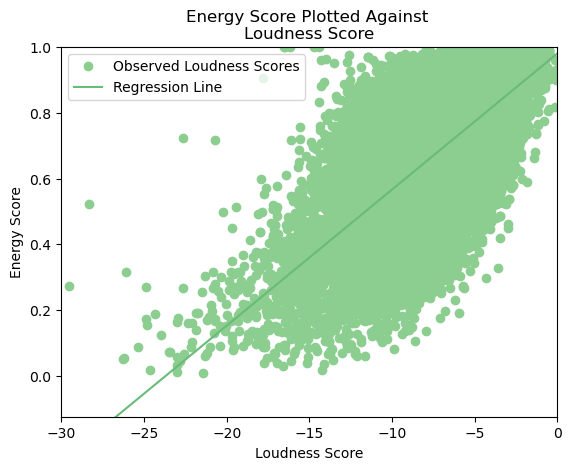

In [25]:
# generate scatterplot with regression line for predicted energy score given loudness score
import matplotlib.pyplot as plt
import seaborn as sns

# regenerate predicted energy values for all loudness scores to match length with all actual energy values
pred_y = model.predict(X)

# create dataframe for plot
plot_df = pd.DataFrame({"Loudness": X['loudness'],
                        "Actual Energy": y,
                        "Predicted Energy": pred_y})

sns.set_palette('Greens_d')

# Create scatter plot for observed data points
ax = plot_df.plot(x='Loudness', y='Actual Energy', style='o', label='Observed Loudness Scores')

# Create line plot for the fitted line
plot_df.sort_values('Loudness', inplace=True)
plot_df.plot(x='Loudness', y='Predicted Energy', kind='line', ax=ax, label='Regression Line')
plt.ylim(-0.125, 1)
plt.xlim(-30, 0)

# Add titles and labels
ax.set_title('Energy Score Plotted Against \nLoudness Score')
ax.set_xlabel('Loudness Score')
ax.set_ylabel('Energy Score')

The trendline indicates a positive correlation between percieved loudness and percieved energy. The datapoints appear to have high variance from the regression line, indicating a week correlation. It is inferrable that an increase in the song's percieved loudness creates an increase in the song's percieved energy among typical listeners. 

In [26]:
# get coefficient, intercept, and regression line equation for the loudness-energy model
coef_loudness_energy = model.coef_[0]
intercept_loudness_energy = model.intercept_
regline_loudness_energy = f"y = {round(model.coef_[0], 2)}x + {round(model.intercept_, 2)}"

# import metric functions from sklearn metrics library
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# get standard metrics (for later comparative analysis)
R2_loudness_energy = r2_score(y_test, y_pred) # R^2 coefficient
mae_loudness_energy = mean_absolute_error(y_test, y_pred) # mean absolute error
mse_loudness_energy = mean_squared_error(y_test, y_pred) # mean squared error

### 7. Comparative Analysis On Performance Of The Prior Two Linear Models

In [27]:
# basic model aspects for the each model
print("DURATION-POPULARITY MODEL:\n")
print(f"Coefficient:                    {coef_duration_popularity}")
print(f"Intercept:                      {intercept_duration_popularity}")
print(f"Regression Line Equation:       {regline_duration_popularity}\n")

# basic model aspects for the duration-popularity model
print("LOUDNESS-ENERGY MODEL:\n")
print(f"Coefficient:                    {coef_loudness_energy}")
print(f"Intercept:                      {intercept_loudness_energy}")
print(f"Regression Line Equation:       {regline_loudness_energy}")

DURATION-POPULARITY MODEL:

Coefficient:                    -3.166983572359975
Intercept:                      51.248513576141555
Regression Line Equation:       y = -3.17x + 51.25

LOUDNESS-ENERGY MODEL:

Coefficient:                    0.04142190954861987
Intercept:                      0.9808112415675094
Regression Line Equation:       y = 0.04x + 0.98


In [28]:
# compare R^2 scores
print(f"R2 Score for Duration-Popularity Model:     {R2_duration_popularity}")
print(f"R2 Score for Loudness-Energy Model:         {R2_loudness_energy}")

R2 Score for Duration-Popularity Model:     0.022347471320095735
R2 Score for Loudness-Energy Model:         0.45893981277607687


In [29]:
# compare mean absolute error scores
print(f"Mean Absolute Error for Duration-Popularity Model:     {mae_duration_popularity}")
print(f"Mean Absolute Error for Loudness-Energy Model:         {mae_loudness_energy}")

Mean Absolute Error for Duration-Popularity Model:     19.647787309470417
Mean Absolute Error for Loudness-Energy Model:         0.10715564016147902


In [30]:
# compare mean squared error scores
print(f"Mean Squared Error for Duration-Popularity Model:     {mse_duration_popularity}")
print(f"Mean Squared Error for Loudness-Energy Model:         {mse_loudness_energy}")

Mean Squared Error for Duration-Popularity Model:     550.3508491579067
Mean Squared Error for Loudness-Energy Model:         0.018304448210338047


#### Conclusions:

* There is a noticable relationship between a song's percieved loudness and its percieved energy; there is no such significant relationship between a song's duration length and its popularity
* The Loudness-Energy model accounts for approximately 46.3% of variability in the dataset, whereas the Duration-Popularity model accounts for only 1.64% of variability
* The Duration-Popularity model has noticably higher error scores than does the Loudness-Energy model